In [91]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from tinycp.classifier import BinaryClassConditionalConformalClassifier
from tinycp.plot import confusion_matrix as conformal_confusion_matrix
from sklearn.metrics import classification_report
import plotly.graph_objects as go
from typing import Optional
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.base import BaseEstimator, TransformerMixin

# EDA

In [92]:
df = pd.read_csv("./data/INFLUD24-03-02-2025.csv", sep=";", encoding="latin1", low_memory=False)

In [93]:
sinais_sintomas = [
    "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", 
    "SATURACAO", "DIARREIA", "VOMITO", "DOR_ABD", "FADIGA", 
    "PERD_OLFT", "PERD_PALA", "OUTRO_SIN", 
    #"OUTRO_DES" #DADOS FALTANTES
]
fatores_risco = [
    #"FATOR_RISC", #CORRELAÇÃO FORTE COM TODOS OS OUTROS FATORES DE RISCO!
    #"PUERPERA",  #DADOS FALTANTES
    "CARDIOPATI", 
    #"HEMATOLOGI",  #DADOS FALTANTES
    #"SIND_DOWN",  #DADOS FALTANTES
    #"HEPATICA",  #DADOS FALTANTES
    "ASMA", 
    "DIABETES", 
    "NEUROLOGIC", 
    "PNEUMOPATI", 
    "IMUNODEPRE", 
    #"RENAL",  #DADOS FALTANTES
    #"OBESIDADE", #DADOS FALTANTES
    #"OBES_IMC",  #DADOS FALTANTES
    "OUT_MORBI", 
    #"MORB_DESC" #DADOS FALTANTES
]
vacinacao = [
    "VACINA_COV", 
    #"DOSE_1_COV",  #DADOS NÃO SELECIONADOS
    #"DOSE_2_COV",   #DADOS NÃO SELECIONADOS
    #"DOSE_REF",   #DADOS NÃO SELECIONADOS
    #"DOSE_2REF",   #DADOS NÃO SELECIONADOS
    #"FAB_COV1",   #DADOS NÃO SELECIONADOS
    #"FAB_COV2",   #DADOS NÃO SELECIONADOS
    #"FAB_COVRF",   #DADOS NÃO SELECIONADOS
    #"FAB_COVRF2",   #DADOS NÃO SELECIONADOS
    #"LOTE_1_COV",   #DADOS NÃO SELECIONADOS
    #"LOTE_2_COV",   #DADOS NÃO SELECIONADOS
    #"LOTE_REF",   #DADOS NÃO SELECIONADOS
    # "LOTE_REF2",   #DADOS NÃO SELECIONADOS
    #"FNT_IN_COV"  #DADOS NÃO SELECIONADOS
]
tratamento = [
    "ANTIVIRAL", 
    #"TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR",  #DADOS NÃO SELECIONADOS
    #"TRAV_COV",  #DADOS NÃO SELECIONADOS
    #"TIPO_TRAV",  #DADOS NÃO SELECIONADOS
    #"OUT_TRAV",  #DADOS NÃO SELECIONADOS
    #"DT_TRAV_COV" #DADOS NÃO SELECIONADOS
]

internacao = [
    "HOSPITAL", 
    #"DT_INTERNA",  #DADOS NÃO SELECIONADOS
    #"SG_UF_INTE",  #DADOS NÃO SELECIONADOS
    #"CO_MU_INTE",  #DADOS NÃO SELECIONADOS
    #"CO_UN_INTE",  #DADOS NÃO SELECIONADOS
    "UTI", 
    #"DT_ENTUTI",  #DADOS NÃO SELECIONADOS
    #"DT_SAIDUTI",  #DADOS NÃO SELECIONADOS
    "SUPORT_VEN"
]
exames = [
    "RAIOX_RES", 
    #"RAIOX_OUT",  #DADOS FALTANTES
    #"DT_RAIOX",  #DADOS NÃO SELECIONADOS
    "TOMO_RES", 
   # "TOMO_OUT",  #DADOS FALTANTES
    #"DT_TOMO",  #DADOS NÃO SELECIONADOS
    "AMOSTRA", 
    #"DT_COLETA",  #DADOS NÃO SELECIONADOS
    "TP_AMOSTRA", 
    #"OUT_AMOST"
]
testes_laboratoriais = [
    "RES_AN", 
    #"POS_AN_FLU",   #DADOS NÃO SELECIONADOS
    #"TP_FLU_AN",   #DADOS NÃO SELECIONADOS
    #"POS_AN_OUT",   #DADOS NÃO SELECIONADOS
    #"AN_SARS2",   #DADOS NÃO SELECIONADOS
    #"AN_VSR",   #DADOS NÃO SELECIONADOS
    #"AN_PARA1",   #DADOS NÃO SELECIONADOS
    #"AN_PARA2",   #DADOS NÃO SELECIONADOS
    #"AN_PARA3",   #DADOS NÃO SELECIONADOS
    #"AN_ADENO",   #DADOS NÃO SELECIONADOS
    #"AN_OUTRO",   #DADOS NÃO SELECIONADOS
    #"DS_AN_OUT"  #DADOS NÃO SELECIONADOS
]
rt_pcr = [
    "PCR_RESUL", 
    #"DT_PCR",   #DADOS NÃO SELECIONADOS
    "POS_PCRFLU", 
    #"TP_FLU_PCR",   #DADOS NÃO SELECIONADOS
    #"PCR_FLUASU",   #DADOS NÃO SELECIONADOS
    #"FLUASU_OUT",   #DADOS NÃO SELECIONADOS
    #"PCR_FLUBLI",   #DADOS NÃO SELECIONADOS
    #"FLUBLI_OUT",   #DADOS NÃO SELECIONADOS
    "POS_PCROUT",
    #"PCR_SARS2",   #DADOS NÃO SELECIONADOS
    #"PCR_VSR",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA1",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA2",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA3",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA4",   #DADOS NÃO SELECIONADOS
    #"PCR_ADENO",   #DADOS NÃO SELECIONADOS
    #"PCR_METAP",   #DADOS NÃO SELECIONADOS
    #"PCR_BOCA",   #DADOS NÃO SELECIONADOS
    #"PCR_RINO",   #DADOS NÃO SELECIONADOS
    #"PCR_OUTRO",   #DADOS NÃO SELECIONADOS
    #"DS_PCR_OUT"  #DADOS NÃO SELECIONADOS
]


In [94]:
columns = (sinais_sintomas 
            + fatores_risco 
            + vacinacao 
            + tratamento 
            + internacao
            + exames
            + testes_laboratoriais
            + rt_pcr)
target = "CASO_SRAG"

In [95]:
df = df[columns + ["CASO_SRAG"]]

In [96]:
is_null = df.isnull().sum()
remove_features = is_null[is_null / len(df) > 0.70].index.tolist()
df = df[df.columns.drop(remove_features)]

In [97]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)

IMUNODEPRE    0.695856
NEUROLOGIC    0.691754
PNEUMOPATI    0.691476
ASMA          0.687209
POS_PCRFLU    0.685441
DIABETES      0.676996
POS_PCROUT    0.670232
OUT_MORBI     0.666411
CARDIOPATI    0.658409
TOMO_RES      0.413032
RAIOX_RES     0.311369
OUTRO_SIN     0.273663
PERD_PALA     0.259017
PERD_OLFT     0.257681
DOR_ABD       0.249405
GARGANTA      0.242386
DIARREIA      0.240408
VOMITO        0.233641
FADIGA        0.233330
ANTIVIRAL     0.191679
SATURACAO     0.150790
DESC_RESP     0.119487
DISPNEIA      0.110783
SUPORT_VEN    0.109432
CASO_SRAG     0.109151
FEBRE         0.105394
RES_AN        0.102488
UTI           0.100743
PCR_RESUL     0.078279
TP_AMOSTRA    0.075052
TOSSE         0.065053
HOSPITAL      0.022456
AMOSTRA       0.020666
VACINA_COV    0.000191
dtype: float64

## Preprocessing

In [98]:
df = df.fillna(9).astype(int)
df = df.replace({9: -1})
df = df[df.columns.drop("TOSSE")] #odd ratio extremamente alto... possível dataleakage?
df = pd.get_dummies(df, columns=df.columns.drop("CASO_SRAG"), drop_first=True).astype(int)
df = df[(df["CASO_SRAG"] > -1)]

#Prevenindo Dummy Variable Trap!
features_out = ["FEBRE_2", "DISPNEIA_2", "DESC_RESP_2", "SATURACAO_2",  # corr < -0.90 com com as dummies 1!
                'NEUROLOGIC_2', 'IMUNODEPRE_2', # corr < -0.70 com FATOR_RISC_2!
                "HOSPITAL_2",  # corr < -0.70 com HOSPITAL_1!
                "UTI_2", #corr < -0.70 com UTI_2!
                "OUTRO_SIN_2", #corr < -0.70 COM OUTRO_SIN_1
                "FADIGA_2", #corr < -0.70 COM FADIGA_1
                "VOMITO_2", #corr < -0.70 com VOMITO_1
                "DOR_ABD_2", #corr < -0.70 com DOR_ABD_1
                "DIARREIA_2" , #corr < -0.70 com DIARREIA_1
                "GARGANTA_2", #corr < -0.70 com GARGANTA_1
                "SUPORT_VEN_3", #corr < -0.70 com SUPORT_VEN_2
                "ASMA_2", #corr < -0.60 com ASMA_1
                "PERD_OLFT_2", #corr < -0.50 com PERDA_OLF_1
                "PERD_PALA_2", #corr < -0.40 PERDA_PALA_1
                "PNEUMOPATI_2", #corr < -.40 PNEUMOPATI_1
                #"SUPORT_VEN_2", #corr < -.50 SUPORT_VEN_1
                ]
df = df[df.columns.drop(features_out)]

In [99]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

## Partialling-Out / Residualization (FWL Theorem)

In [100]:
class FeatureResidualizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        """Feature transformer that reduces multicollinearity by residualizing highly correlated features.
    
        For each feature strongly correlated (above `corrcoef` threshold) with others, this class:
        1. Fits a linear regression model using the correlated features as predictors.
        2. Replaces the original feature with residuals (observed - predicted) from the model,
        effectively removing linear dependencies.
        
        Useful as a preprocessing step for linear models where multicollinearity is problematic.
        
        Attributes
        ----------
        models_ : Dict[int, Dict[str, Any]]
            Dictionary storing residualization models for each processed feature.
            Keys are feature indices; values are dicts with:
            - "model": Fitted `LinearRegression` object.
            - "features": Indices of features used as predictors.
        feature_names_in_ : Optional[np.ndarray]
            Names of input features if provided in a pandas DataFrame.
        n_features_in_ : Optional[int]
            Number of features seen during fit.

        Notes
        -----
        - Computes absolute Pearson correlations between all feature pairs (ignoring self-correlations)  
        - Processes features in descending order of total correlation with others  
        - For each target feature:  
          - Selects correlated predictors (≥ threshold) not yet residualized  
          - Fits linear model: target ~ predictors  
          - Replaces target feature with model residuals  
          - Excludes residualized features from future predictor sets  
        - Preserves:  
          - Feature order and non-correlated features  
          - Non-linear relationships  
        - Prevents circular dependencies by marking residualized features  
        - Only removes linear relationships between features  

        """
        self.models_ = None
        self.feature_names_in_ = None
        self.n_features_in_ = None

    def fit(self, X: np.ndarray, corrcoef: float = 0.8, corr_type: str = "abs"):
        """
        Identify feature pairs with absolute correlation ≥ `corrcoef` and prepare residualization models.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Input data. Can be a pandas DataFrame (preserves column names) or numpy array.
        corrcoef : float, default=0.8
            Absolute correlation threshold for triggering residualization.
            Features with |ρ| ≥ this value will be residualized.
        corr_type : str, default="abs"
            Type of correlation to consider:
            - "abs": absolute correlation (default)
            - "pos": only positive correlation
            
        Returns
        -------
        self : FeatureResidualizer
            Fitted transformer.
        """

        if not 0 <= corrcoef <= 1:
            raise ValueError("corrcoef must be between 0 and 1")
            
        if corr_type not in ["abs", "pos"]:
            raise ValueError("corr_type must be either 'abs' or 'pos'")

        self.models_ = {}
        self.feature_names_in_ = getattr(X, 'columns', None)
        X = check_array(X, ensure_2d=True, dtype=np.float64, copy=True)
        self.n_features_in_ = X.shape[1]
        corr = np.corrcoef(X, rowvar=False)
        
        if corr_type == "abs":
            corr = np.abs(corr)
            processing_order = np.argsort(-np.sum(corr, axis=1))
        elif corr_type == "pos":
            corr = np.where(corr < 0, 0, corr)
            processing_order = np.argsort(-np.sum(corr, axis=1))
        
        np.fill_diagonal(corr, 0)
        residualized = []

        for i in processing_order:
            corr_feature = corr[i]
            mask = np.ones(corr_feature.shape, dtype=bool)
            mask[residualized] = False
            indexes = np.argwhere((corr_feature >= corrcoef) & mask).flatten()

            if len(indexes) > 0:
                model = LinearRegression()
                model.fit(X[:, indexes], X[:, i])
  
                self.models_[i] = {"model": model,
                                "features": indexes,
                            }
                residualized.append(i)
        
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Apply residualization to the input data using pre-trained models.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Data to transform. Must match feature count of `fit()` input.
            
        Returns
        -------
        X_transformed : ndarray of shape (n_samples, n_features)
            Data with residualized features (others remain unchanged).
            
        Raises
        ------
        ValueError
            If number of features in X doesn't match training data.
        """
        
        check_is_fitted(self, 'models_')
        X = check_array(X, ensure_2d=True, dtype=np.float64, copy=True)
        
        if X.shape[1] != self.n_features_in_:
            raise ValueError(
                f"Expected {self.n_features_in_} features, got {X.shape[1]}"
            )
        
        for i, model_info in self.models_.items():
            model_info = self.models_[i]
            X[:, i] -= model_info["model"].predict(X[:, model_info["features"]])
            
        return X
    
    def fit_transform(self, X: np.ndarray, corrcoef: float = 0.8, corr_type: str = "abs") -> np.ndarray:
        """Convenience method for fit().transform()."""
        return self.fit(X, corrcoef=corrcoef, corr_type=corr_type).transform(X)

In [101]:
dummy_sintomas = []
for sintoma in sinais_sintomas:
    dummy = df.columns[df.columns.str.startswith(sintoma)]
    dummy_sintomas = dummy_sintomas + dummy.tolist()
dummy_fatores_risco = []
for fator in fatores_risco:
    dummy = df.columns[df.columns.str.startswith(fator)]
    dummy_fatores_risco = dummy_fatores_risco + dummy.tolist()

dummy_internacao = []
for inter in internacao:
    dummy = df.columns[df.columns.str.startswith(inter)]
    dummy_internacao = dummy_internacao + dummy.tolist()


In [102]:
y_train = df_train["CASO_SRAG"]
y_test = df_test["CASO_SRAG"]
X_train = df_train[df_train.columns[df_train.columns != target]]
X_test = df_test[df_test.columns[df_test.columns != target]]

### Residualizar Sinais e Sintomas

In [103]:
residualizer = FeatureResidualizer()
residualizer.fit(df_train[dummy_sintomas], corrcoef=0.70)

FeatureResidualizer()

In [104]:
#Train
X_train = X_train.astype({x: float for x in dummy_sintomas})
X_train.loc[:, dummy_sintomas] = residualizer.transform(X_train[dummy_sintomas])

#Test
X_test = X_test.astype({x: float for x in dummy_sintomas})
X_test.loc[:, dummy_sintomas] = residualizer.transform(X_test[dummy_sintomas])

### Residualizar Fatores de Risco

In [105]:
residualizer = FeatureResidualizer()
residualizer.fit(df_train[dummy_fatores_risco], corrcoef=0.70)

FeatureResidualizer()

In [106]:
#Train
X_train = X_train.astype({x: float for x in dummy_fatores_risco})
X_train.loc[:, dummy_fatores_risco] = residualizer.transform(X_train[dummy_fatores_risco])

#Test
X_test = X_test.astype({x: float for x in dummy_fatores_risco})
X_test.loc[:, dummy_fatores_risco] = residualizer.transform(X_test[dummy_fatores_risco])

### Residualizar Internação

In [107]:
residualizer = FeatureResidualizer()
residualizer.fit(df_train[dummy_internacao], corrcoef=0.70)

FeatureResidualizer()

In [108]:
#Train
X_train = X_train.astype({x: float for x in dummy_internacao})
X_train.loc[:, dummy_internacao] = residualizer.transform(X_train[dummy_internacao])

#Test
X_test = X_test.astype({x: float for x in dummy_internacao})
X_test.loc[:, dummy_internacao] = residualizer.transform(X_test[dummy_internacao])

## Heatmap

In [109]:
def corr_heatmap(X: np.ndarray, width: int = 1600, height: int = 1600, fig_type: Optional[str] = None) -> go.Figure:
    """
    Generate an interactive correlation heatmap for a DataFrame using Plotly Express.
    
    This function visualizes the correlation matrix between all numeric columns in the DataFrame,
    with values displayed on each cell and a diverging color scale (blue for negative, red for positive correlations).

    Parameters:
    -----------
    df : np.ndarray
        A matrix containing numeric columns to compute correlations.
        Non-numeric columns will be automatically excluded.
    width : int, optional
        Width of the figure in pixels (default: 1600)
    height : int, optional
        Height of the figure in pixels (default: 1600)
    fig_type : str, optional
        Display type for the figure (particularly useful in Jupyter notebooks).
        Common options: None (default), 'notebook', or other Plotly-supported renderers.
        (default: None)

    Returns:
    --------
    None
        Displays the heatmap directly.

    Examples:
    --------
    >>> # Basic usage with default size
    >>> corr_heatmap(df)
    
    >>> # Custom size
    >>> corr_heatmap(df, width=1200, height=1200)
    
    >>> # For Jupyter notebook display
    >>> corr_heatmap(df, fig_type='notebook')

    Notes:
    ------
    - The correlation matrix is computed using pandas.DataFrame.corr() (Pearson correlation)
    - The color scale ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation)
    - Diagonal elements will always be 1 (perfect self-correlation)
    - Only numeric columns are included in the calculation (equivalent to numeric_only=True)
    """
    feature_names_in_ = getattr(X, 'columns', None)
    X = check_array(X, ensure_2d=True, dtype=np.float64, copy=True)

    if feature_names_in_ is None:
        feature_names_in_ = [f'feature_{i}' for i in range(X.shape[1])]
    
    corr = np.corrcoef(X, rowvar=False)
    
    fig = px.imshow(
        corr,
        text_auto=True,   
        aspect="equal",   
        color_continuous_scale='RdBu_r', 
        title='Heatmap of Correlation Coefficients',
        labels=dict(color="Correlation"),
        x=feature_names_in_, 
        y=feature_names_in_ 
    )
    
    fig.update_layout(
        width=width,
        height=height,
        xaxis_title='Features',
        yaxis_title='Features',
        title_x=0.5 
    )
    
    return fig.show(fig_type)

### Sinais e Sintomas

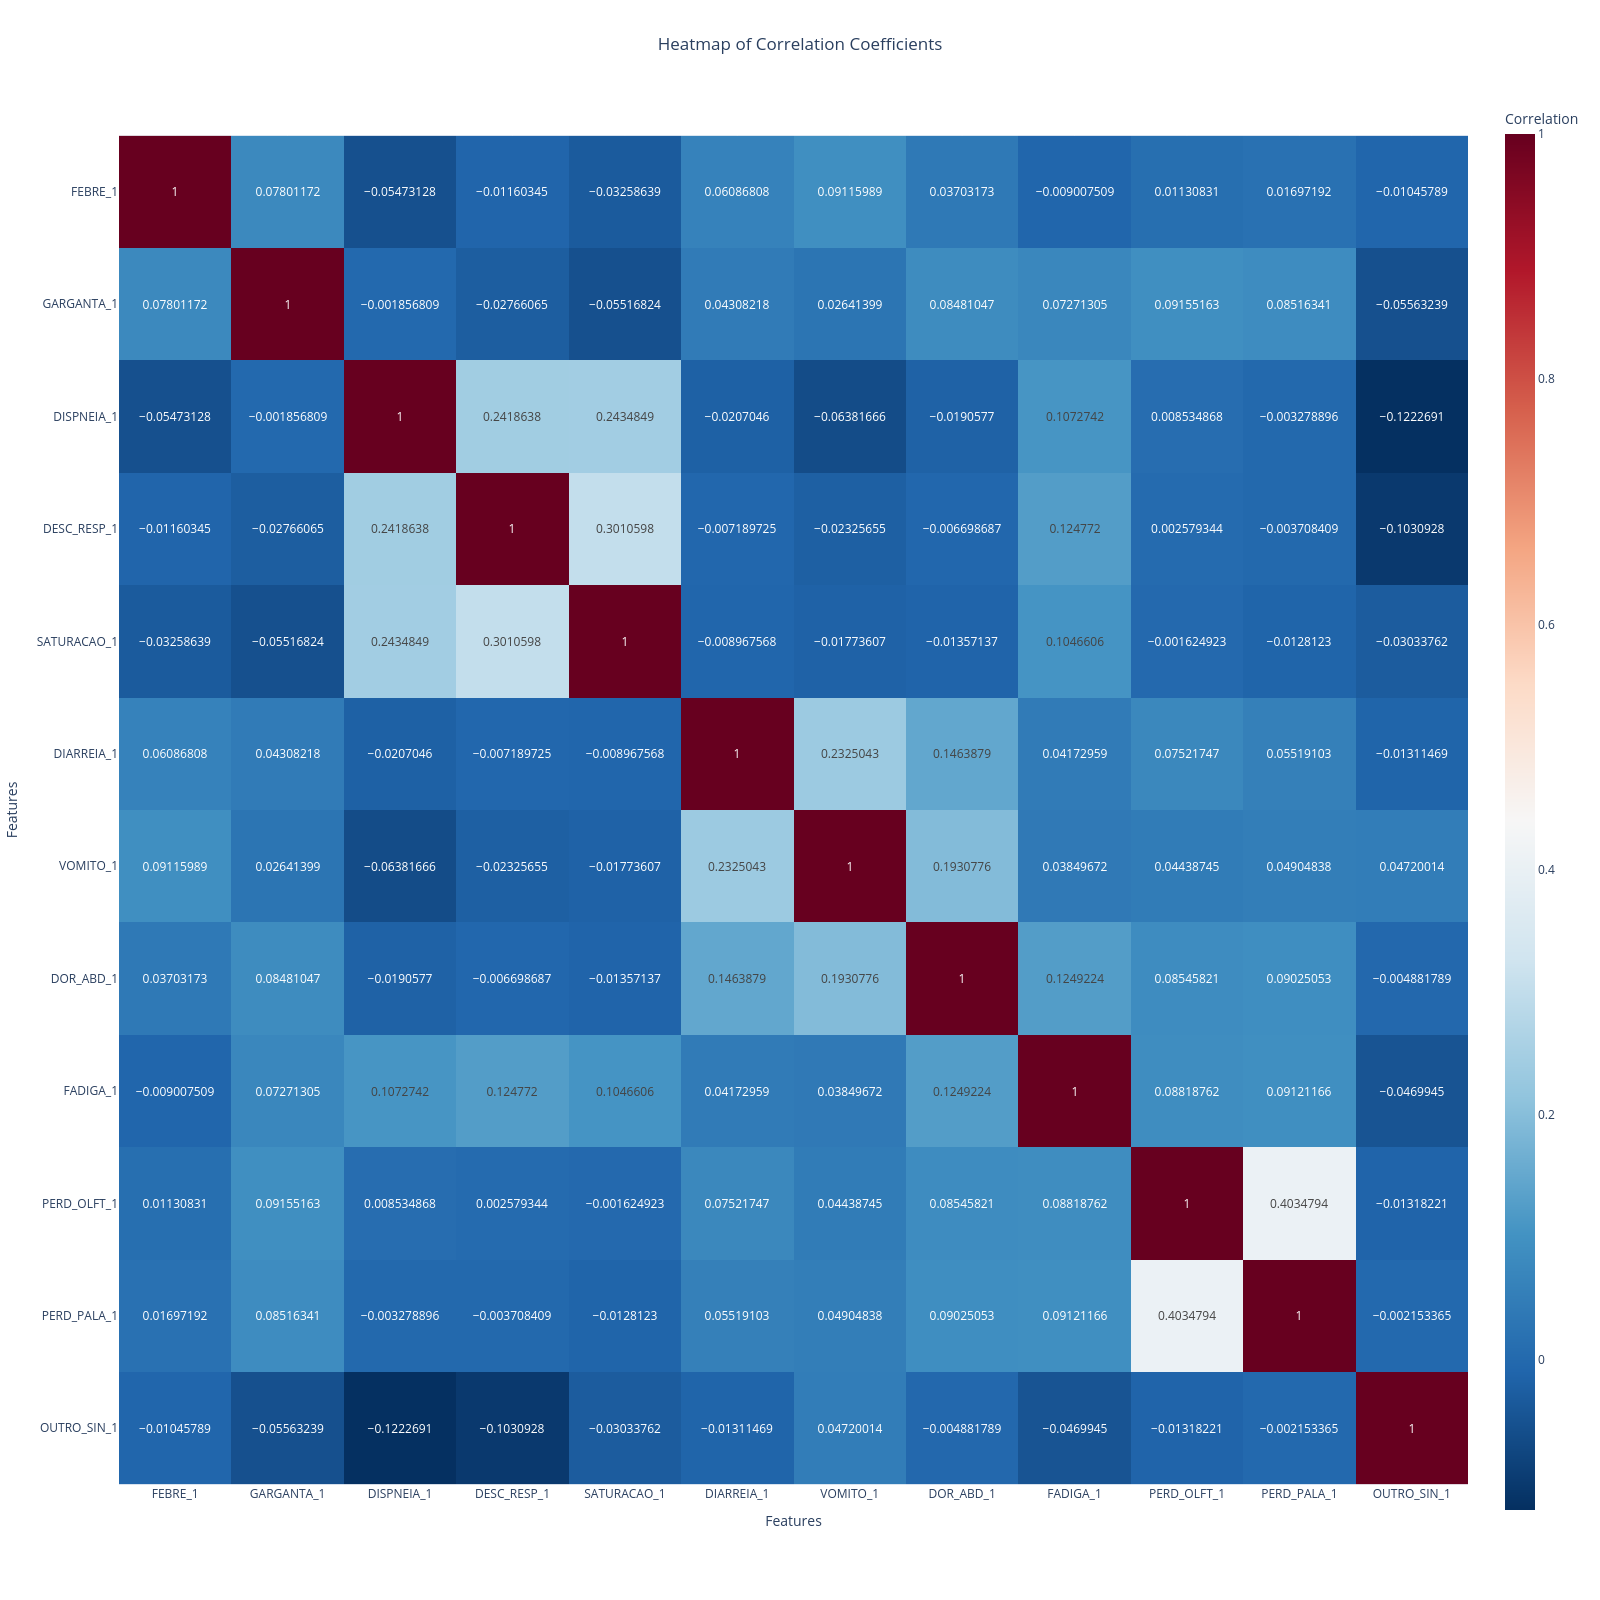

In [110]:
corr_heatmap(X_train[dummy_sintomas], fig_type="png")

### Fatores de Risco

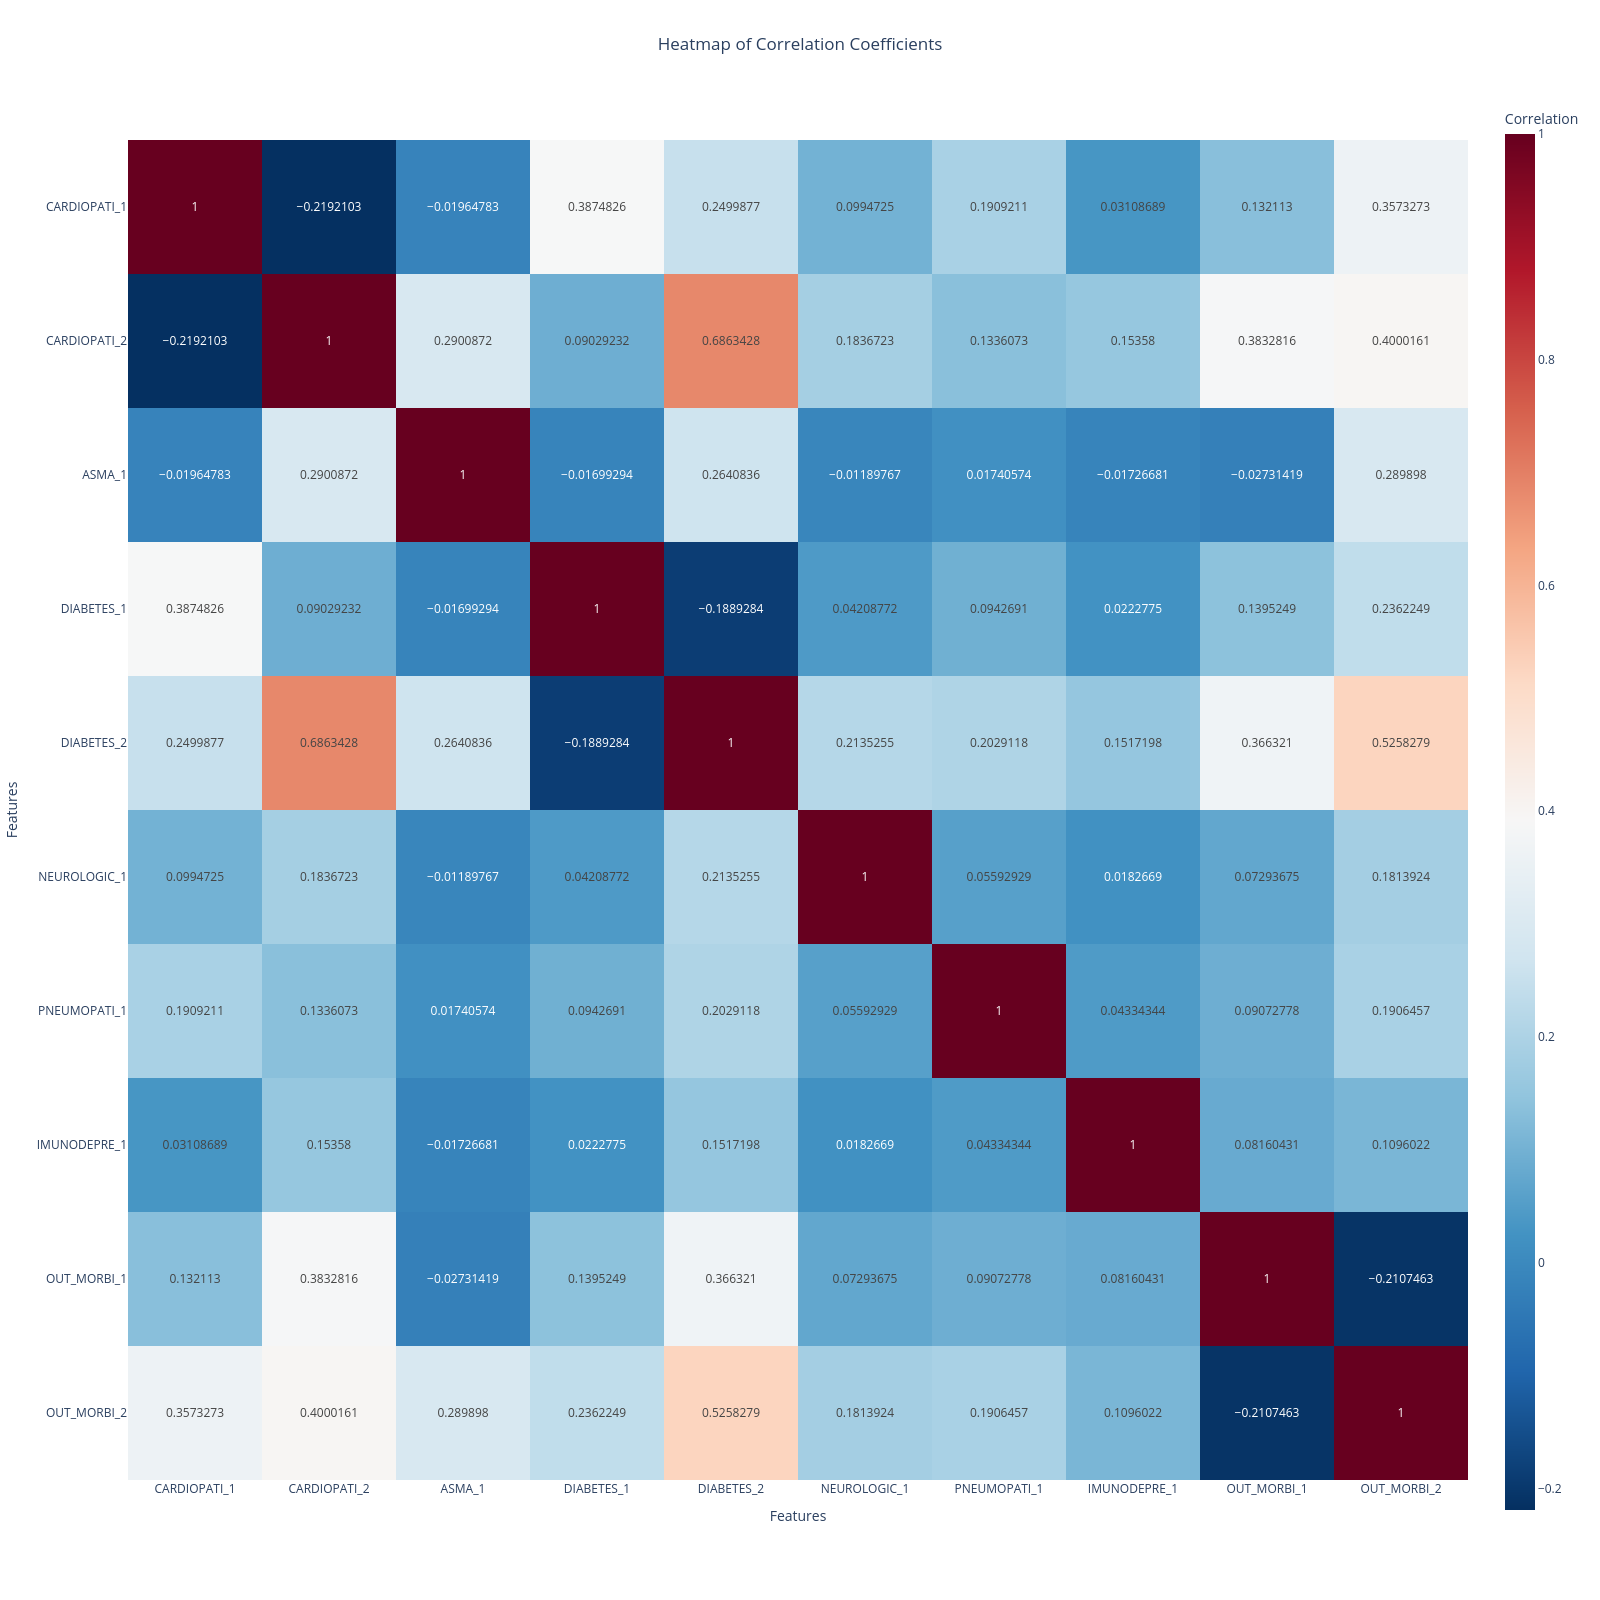

In [111]:
corr_heatmap(X_train[dummy_fatores_risco], fig_type="png")

### Internação

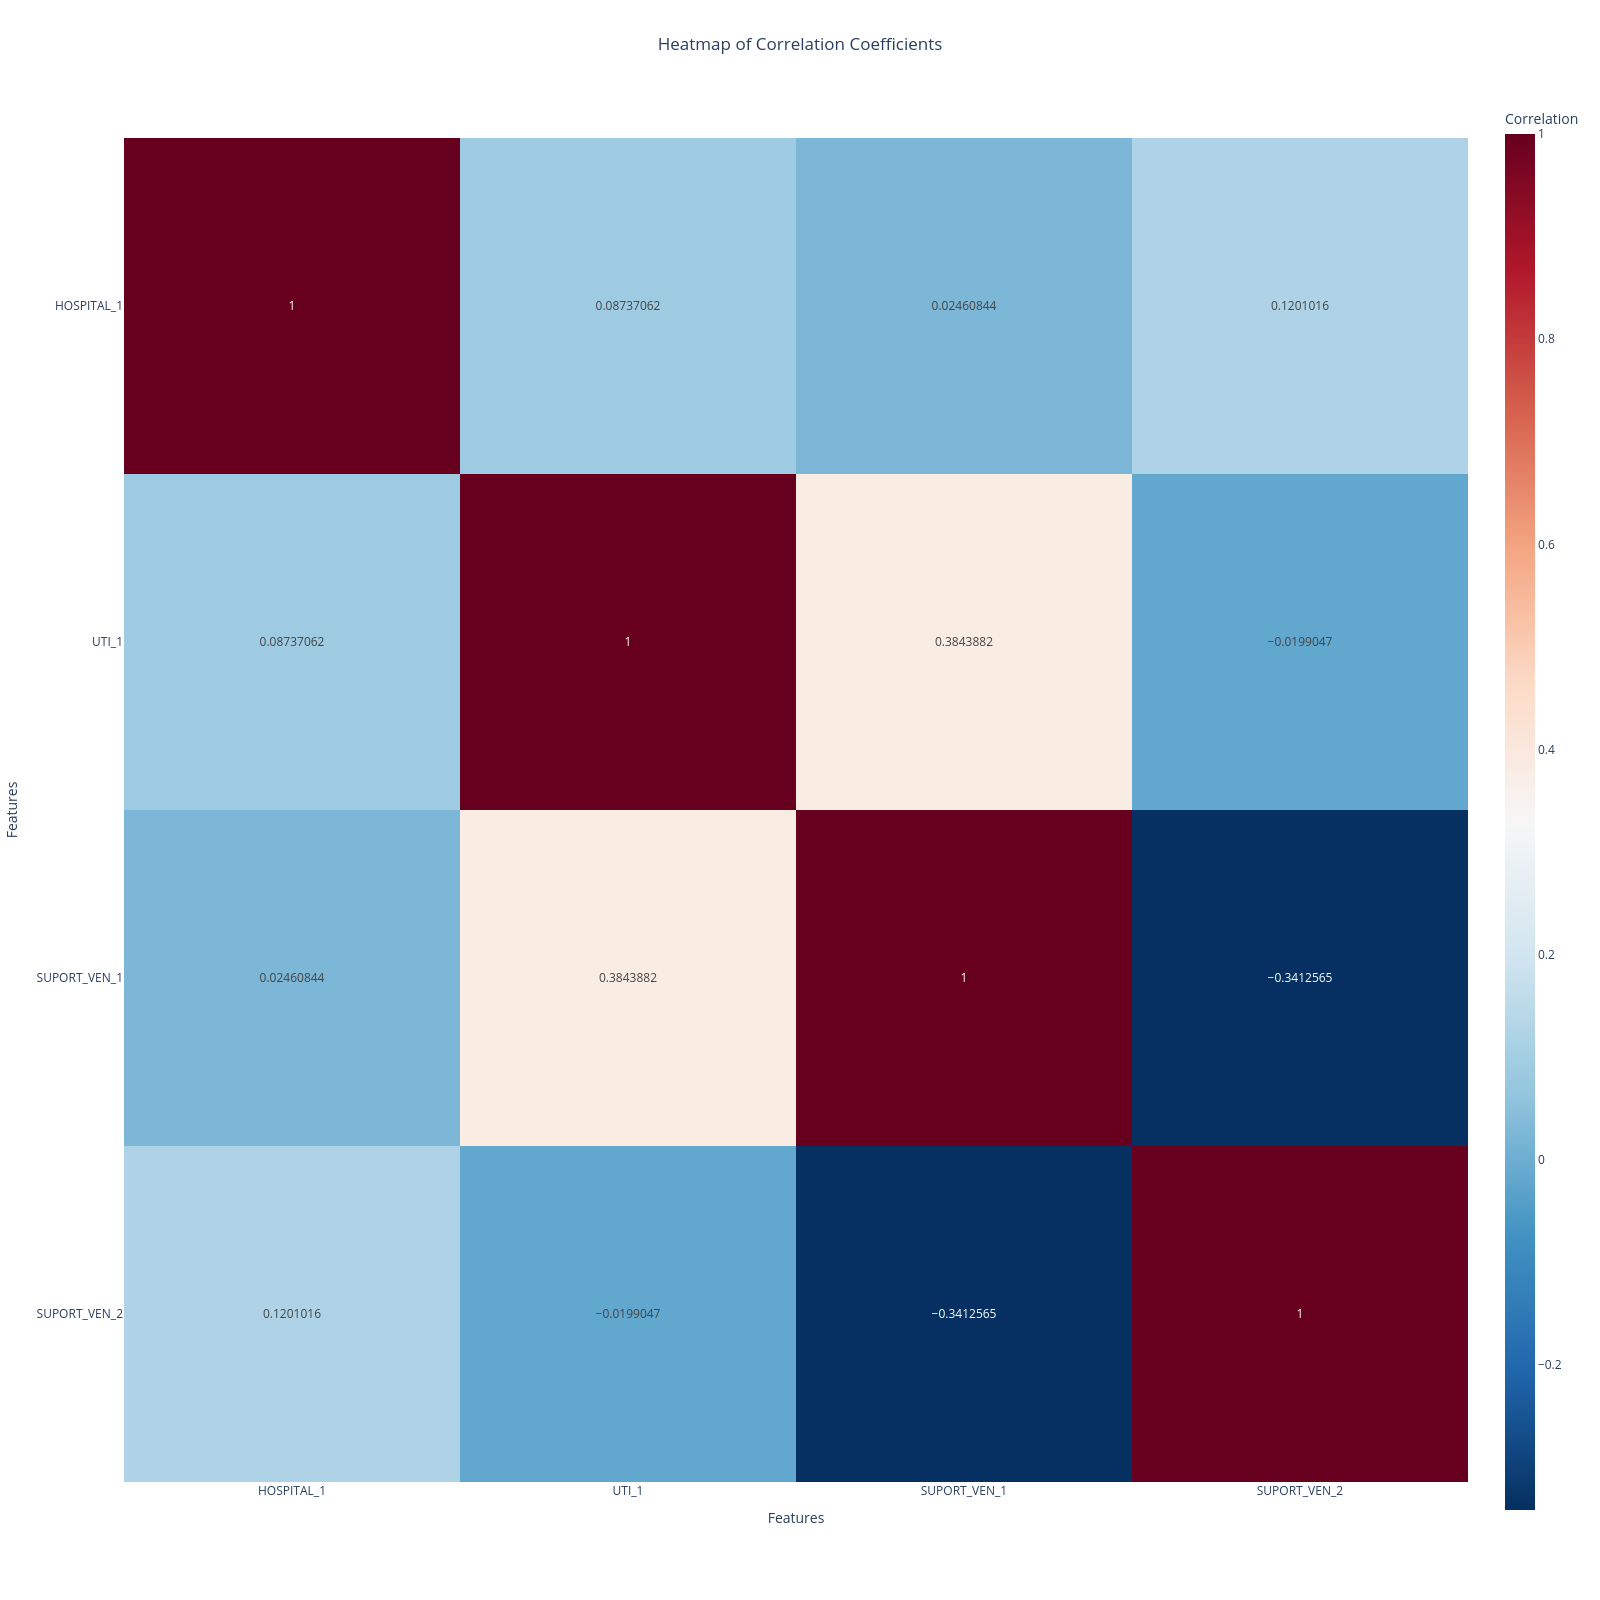

In [112]:
corr_heatmap(X_train[dummy_internacao], fig_type="png")

### Heatmap

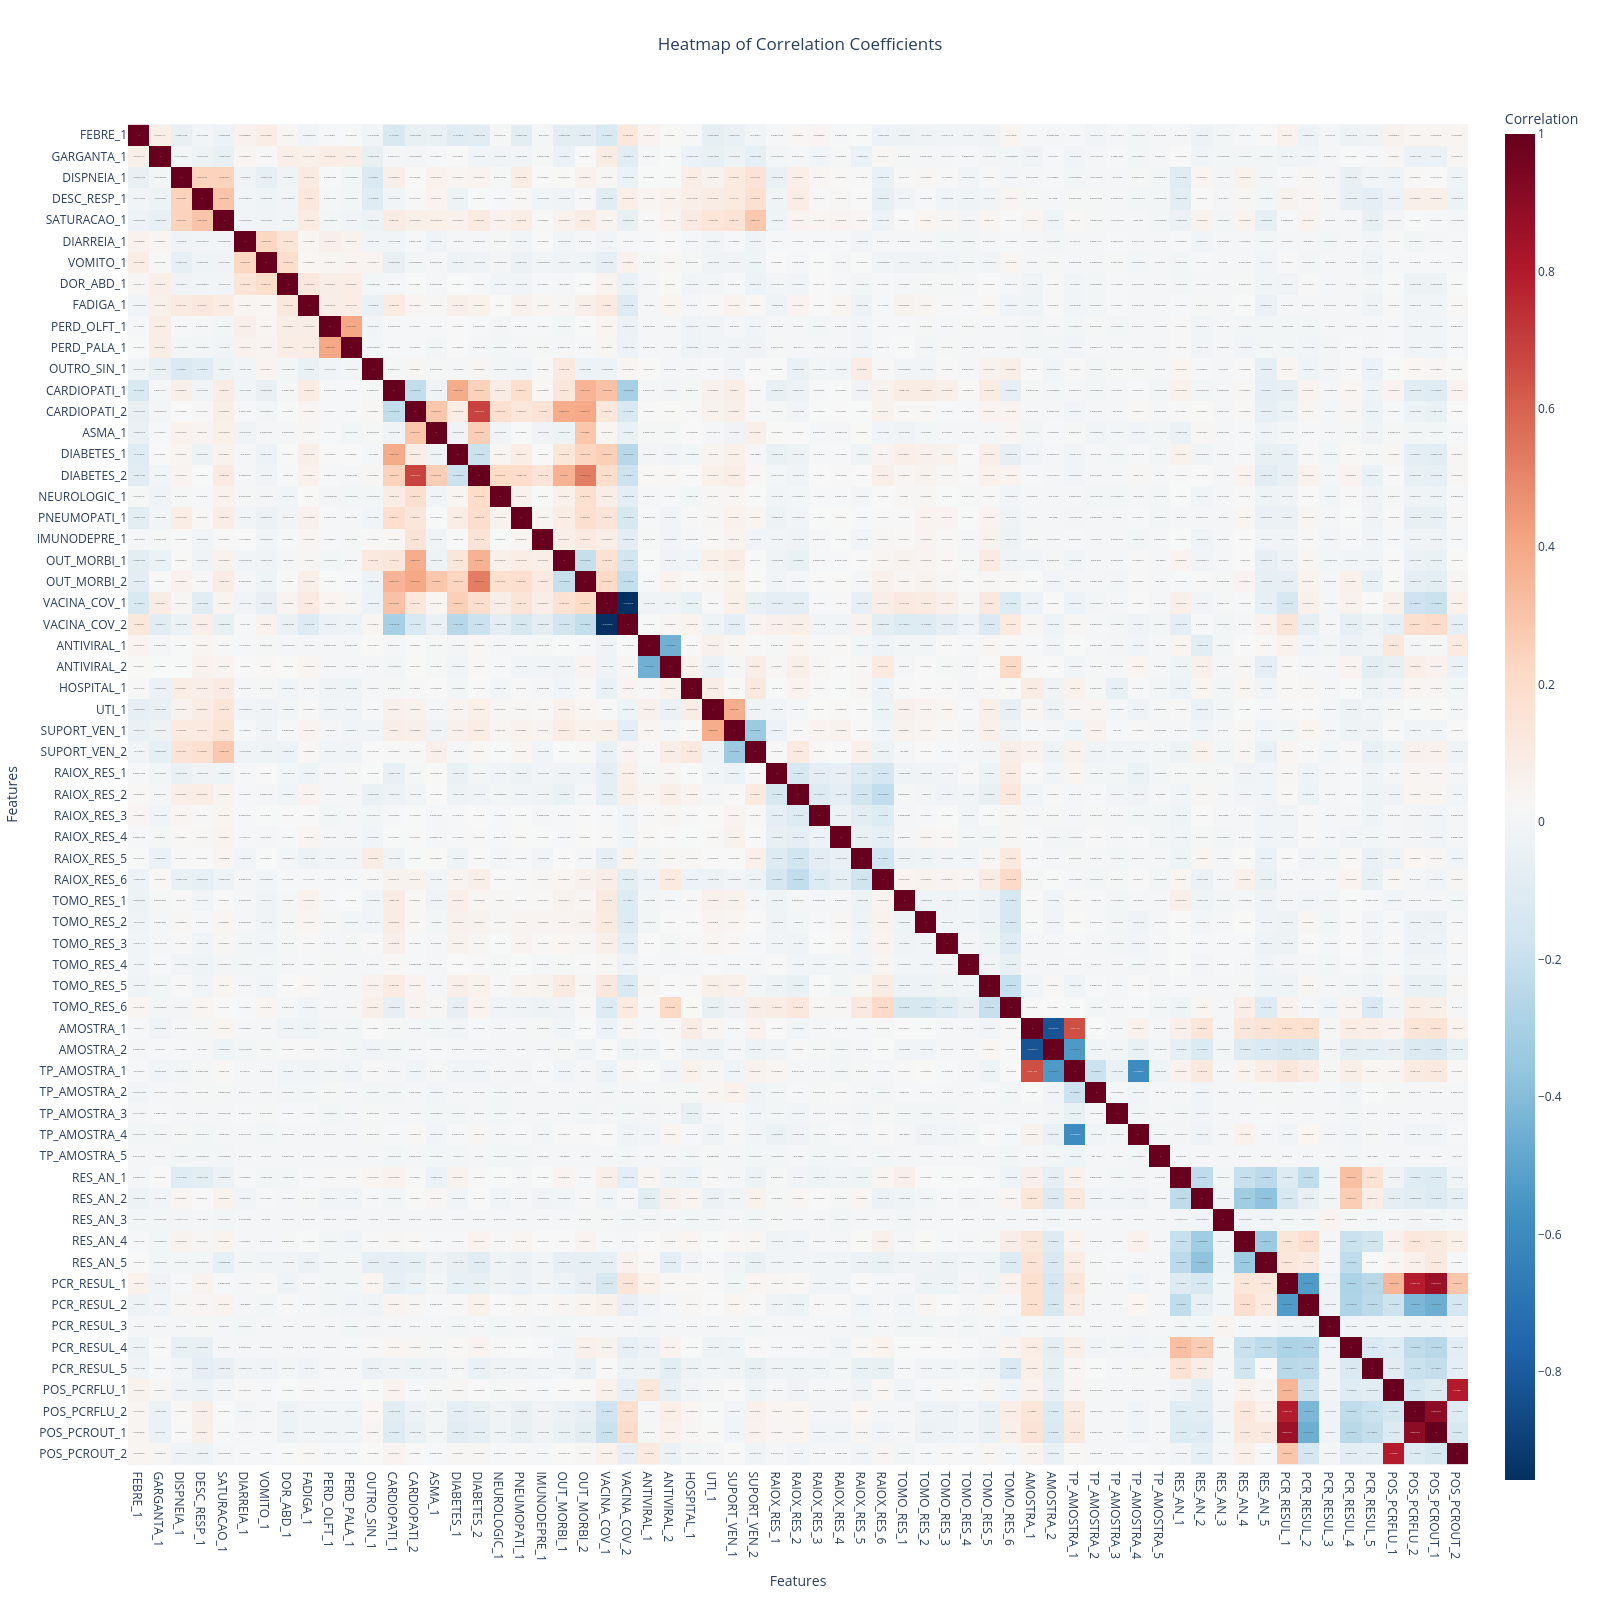

In [113]:
corr_heatmap(X_train, fig_type="png")

## Filtering based on VIF

In [114]:
from typing import Union
import numpy as np
from sklearn.utils.validation import check_array
from joblib import Parallel, delayed

def filter_features_by_vif(
    X: Union[np.ndarray, 'pd.DataFrame'], 
    threshold: float = 5, 
    verbose: bool = False,
    n_jobs: int = -1
) -> np.ndarray:
    """Filter features based on Variance Inflation Factor (VIF) to reduce multicollinearity.
    
    Iteratively removes features with VIF above the specified threshold until all remaining
    features have VIF below the threshold or only one feature remains. Uses parallel computation
    for efficient VIF calculation.

    Parameters
    ----------
    X : Union[np.ndarray, pd.DataFrame]
        Input feature matrix of shape (n_samples, n_features). 
        Should be numeric and not contain missing values.
    threshold : float, optional
        VIF threshold for feature removal (default=15.0).
        Typical interpretation:
        - 1: No correlation
        - 1-5: Moderate correlation
        - 5-10: High correlation
        - >10: Very high correlation (consider removal)
    verbose : bool, optional
        If True, prints progress information during feature removal (default=False).
    n_jobs : int, optional
        Number of CPU cores to use for parallel computation (default=-1, all available cores).

    Returns
    -------
    np.ndarray
        Boolean mask of shape (n_features,) where:
        - True indicates the feature should be kept
        - False indicates the feature should be removed

    Raises
    ------
    ValueError
        If input validation fails (invalid threshold, empty array, insufficient samples/features).
    TypeError
        If input types are incorrect.

    Examples
    --------
    >>> from sklearn.datasets import make_regression
    >>> X, _ = make_regression(n_samples=100, n_features=10, n_informative=5)
    >>> mask = filter_features_by_vif(X, threshold=5.0)
    >>> filtered_X = X[:, mask]
    """

    if not isinstance(threshold, (int, float)) or threshold < 1:
        raise ValueError("Threshold must be a numeric value >= 1.")
    if not isinstance(verbose, bool):
        raise TypeError("Verbose must be a boolean value.")
    if not isinstance(n_jobs, int):
        raise TypeError("n_jobs must be an integer.")
    
    feature_names_in_ = getattr(X, 'columns', None)
    X = check_array(X, ensure_2d=True, dtype=np.float64, copy=True)
    
    if X.size == 0:
        raise ValueError("Input X cannot be empty.")
    if X.shape[0] < 2:
        raise ValueError("Input X must have at least two samples.")
    if X.shape[1] < 2:
        raise ValueError("Input X must have at least two features.")

    features = np.ones(X.shape[1], dtype=bool)
    
    def _vif(X: np.ndarray, i: int) -> float:
        """Helper function to compute VIF for a single feature."""
        y = X[:, i]
        X = np.delete(X, i, axis=1)
        model = LinearRegression().fit(X, y)
        r_squared  = model.score(X, y)
        return 1. / (1. - r_squared) if r_squared < 1 else np.inf
    
    for _ in range(features.shape[0]):
        vif = np.zeros(features.shape[0])
        mask = np.where(features)[0]
        
        if len(mask) < 2:
            break
        
        vif[mask] = Parallel(n_jobs=n_jobs)(
            delayed(_vif)(X[:, features], i)
            for i in range(X[:, features].shape[1])
        )
        max_vif = np.max(vif)
        
        if max_vif <= threshold:
            break
            
        idx_max_vif = np.argmax(vif)
        features[idx_max_vif] = False
        
        if verbose:
            feature_name = (feature_names_in_[idx_max_vif] 
                          if feature_names_in_ is not None 
                          else idx_max_vif)
            print(f"Removing feature {feature_name} with VIF: {max_vif:.2f}")
    
    return features

In [115]:
sample = X_train.sample(40000, random_state=42)
mask_features = filter_features_by_vif(sample, threshold=5, verbose=True)
filtered_features = np.asarray(X_train.columns)[mask_features].tolist()

Removing feature PCR_RESUL_1 with VIF: 44.73
Removing feature VACINA_COV_1 with VIF: 12.14
Removing feature POS_PCROUT_1 with VIF: 11.56
Removing feature AMOSTRA_1 with VIF: 9.04
Removing feature DIABETES_2 with VIF: 8.05


In [116]:
def generate_vif_dataframe(df, features):   

    def _vif(X, i):
        y = X[:, i]
        X = np.delete(X, i, axis=1)
        model = LinearRegression().fit(X, y)
        r_2 = model.score(X, y)
        return 1. / (1. - r_2) if r_2 < 1 else np.inf
     
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [_vif(df[features].values, i) for i in range(df[features].shape[1])]
    vif_data["Tolerance"] = 1 / vif_data["VIF"]
    return vif_data

In [117]:
df_vif = generate_vif_dataframe(X_train, filtered_features)

In [118]:
df_vif.sort_values(by="Tolerance").head(20)

,feature,VIF,Tolerance
51,PCR_RESUL_2,4.816101,0.207637
41,TP_AMOSTRA_1,4.696321,0.212933
47,RES_AN_2,4.553934,0.219590
50,RES_AN_5,4.451051,0.224666
56,POS_PCRFLU_2,4.283645,0.233446
49,RES_AN_4,4.039782,0.247538
55,POS_PCRFLU_1,3.803800,0.262895
46,RES_AN_1,3.223554,0.310217
53,PCR_RESUL_4,3.107652,0.321786
13,CARDIOPATI_2,3.069607,0.325775


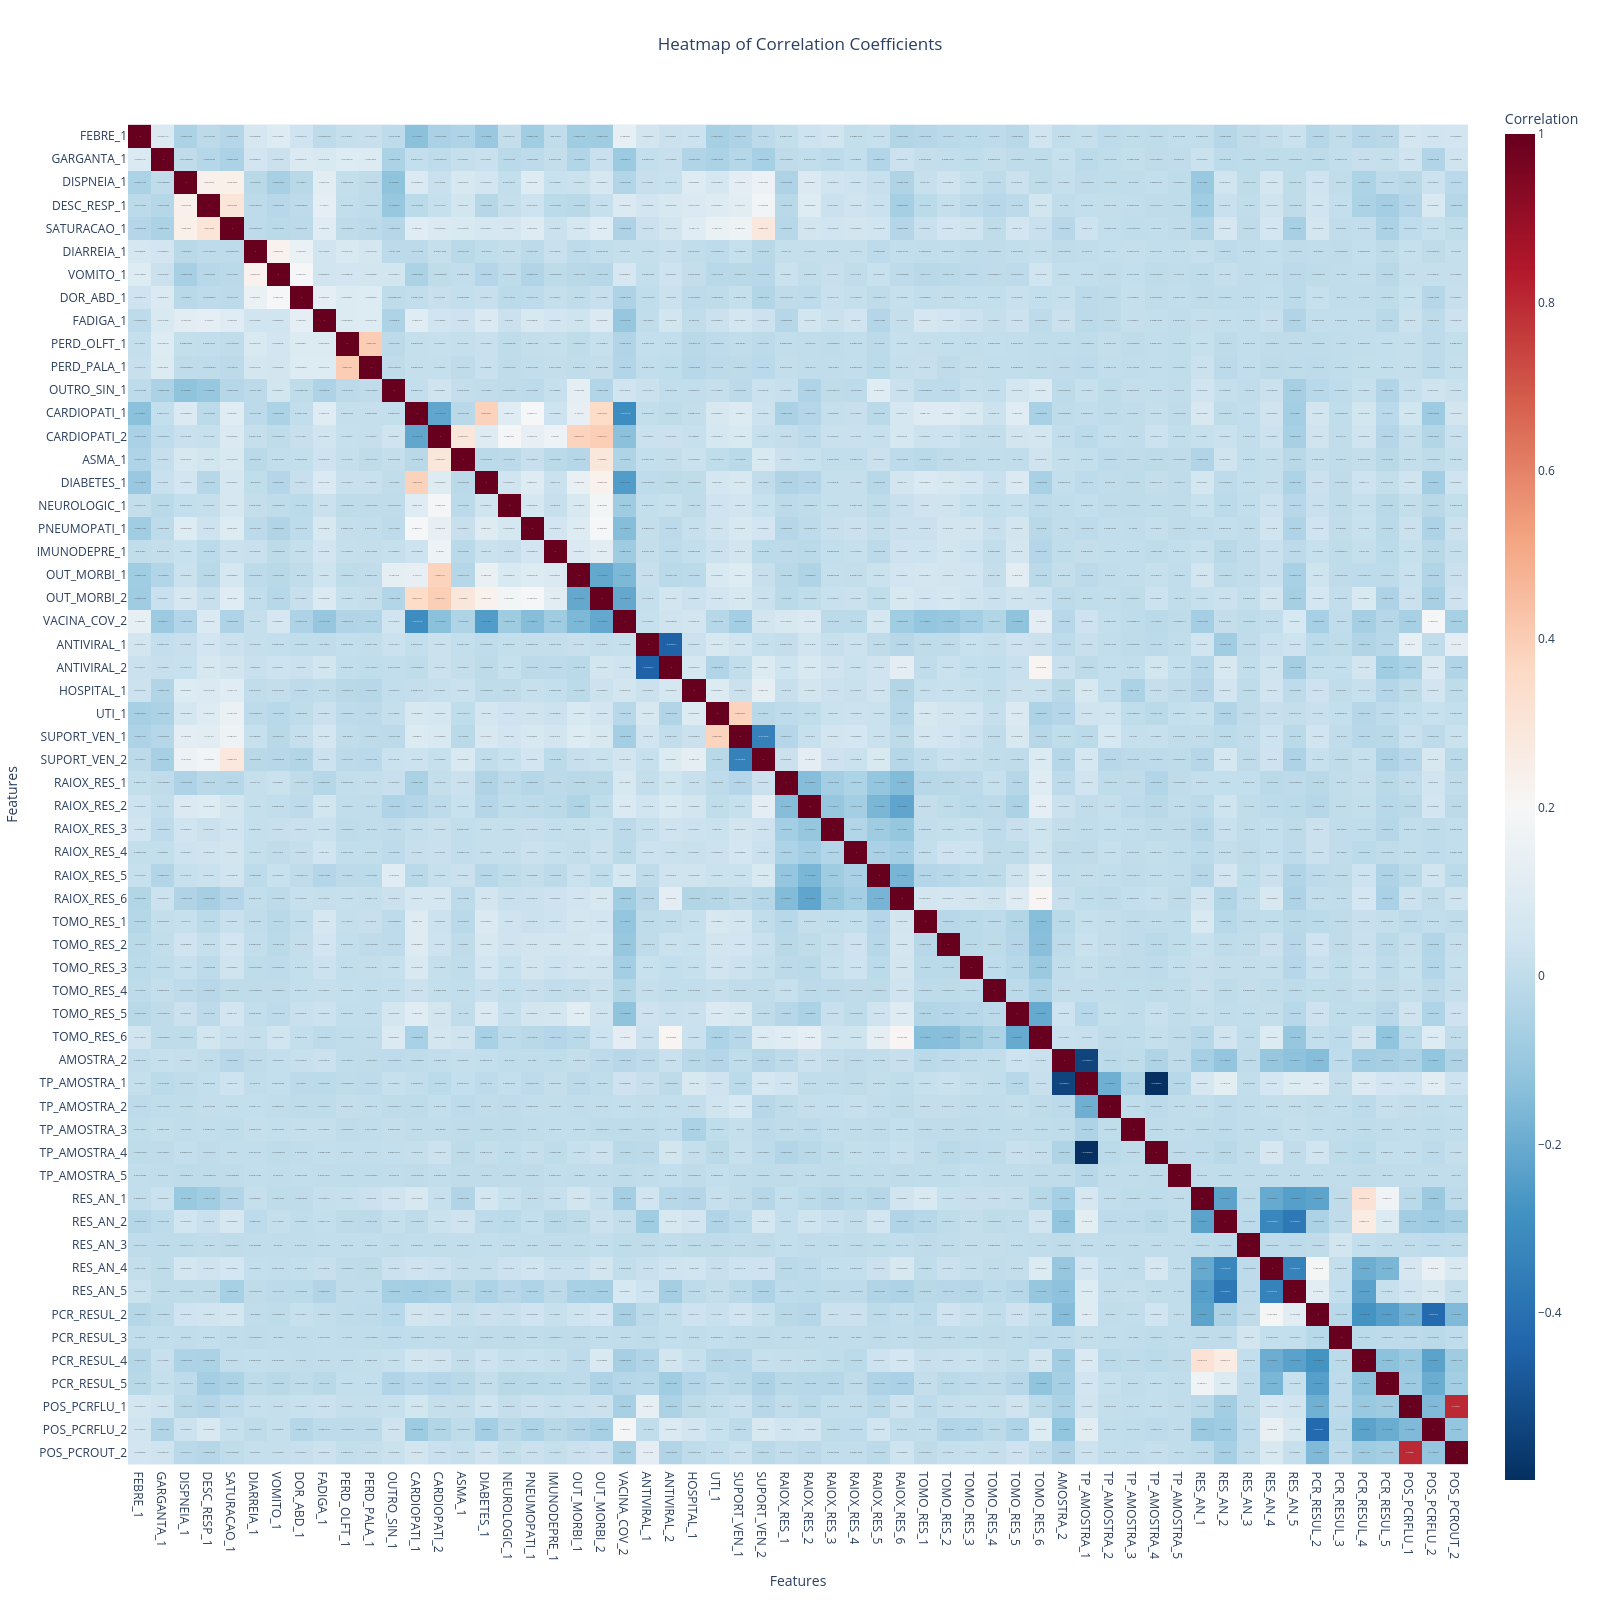

In [119]:
corr_heatmap(X_train[filtered_features], width=1600, height=1600, fig_type="png")

In [120]:
def barplot_corr_with_target(
    X: Union[pd.DataFrame, np.ndarray],
    y: Union[pd.Series, np.ndarray],
    target_name: str = 'target',
    width: int = 800,
    height: int = 600,
    color_scale: str = 'RdBu',
    top_n: int = None,
    threshold: float = None,
    fig_type: str = None,
) -> go.Figure:
    """
    Plot correlation coefficients between features and target using Plotly.
    
    Parameters:
    -----------
    X : pd.DataFrame or np.ndarray
        Feature matrix. If DataFrame, column names will be used as feature names.
        If ndarray, features will be named automatically as 'feature_0', 'feature_1', etc.
    y : pd.Series or np.ndarray
        Target variable (1D array-like)
    target_name : str, optional
        Name to display for target variable (default: 'target')
    width : int, optional
        Figure width in pixels (default: 800)
    height : int, optional
        Figure height in pixels (default: 600)
    color_scale : str, optional
        Color scale for the plot (default: 'RdBu')
        Can be any valid Plotly continuous color scale name
    top_n : int, optional
        If specified, plot only top N features with highest absolute correlation
        (default: None shows all features)
    threshold : float, optional
        If specified, plot only features with absolute correlation >= threshold
        (default: None shows all features)
    fig_type : str, optional
        Figure output type (for Jupyter notebooks, can be 'notebook' or None)
        (default: None shows the figure in a new window)
    
    Returns:
    --------
    None
        Displays the plot directly
    
    Examples:
    --------
    >>> # With DataFrame/Series
    >>> barplot_corr_with_target(X_df, y_series)
    
    >>> # With numpy arrays
    >>> barplot_corr_with_target(X_array, y_array, target_name='price')
    
    >>> # Showing only top 10 features
    >>> barplot_corr_with_target(X, y, top_n=10)
    
    >>> # Only features with correlation >= 0.3
    >>> barplot_corr_with_target(X, y, threshold=0.3)
    """

    feature_names_in_ = getattr(X, 'columns', None)
    target_name = getattr(y, 'name', target_name)
    X = check_array(X, ensure_2d=True, dtype=np.float64, copy=True)

    if feature_names_in_ is None:
        feature_names_in_ = [f'feature_{i}' for i in range(X.shape[1])]
    
    data = np.column_stack((X, y))
    corr = np.corrcoef(data, rowvar=False)
    corr_target = corr[:-1, -1]
    corr_series = pd.Series(corr_target, index=feature_names_in_, name='correlation')
    corr_sorted = corr_series.sort_values(key=np.abs, ascending=False)

    if top_n is not None:
        corr_sorted = corr_sorted.head(top_n)
    if threshold is not None:
        corr_sorted = corr_sorted[np.abs(corr_sorted) >= threshold]
    
    fig = px.bar(
        corr_sorted,
        orientation='h',
        color=corr_sorted,
        color_continuous_scale=color_scale,
        title=f'Correlation Coefficients with {target_name}',
        labels={'x': 'Correlation Coefficient', 'y': 'Feature'},
        width=width,
        height=height,
        text=np.round(corr_sorted, 3)
    )
    
    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        coloraxis_colorbar={
            'title': 'Correlation',
            'tickvals': [-1, -0.5, 0, 0.5, 1],
            'ticktext': ['-1 (Neg)', '-0.5', '0', '0.5', '1 (Pos)']
        },
        hovermode='y',
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    
    fig.add_vline(
        x=0,
        line_width=1,
        line_dash="dash",
        line_color="grey"
    )
    
    return fig.show(fig_type)

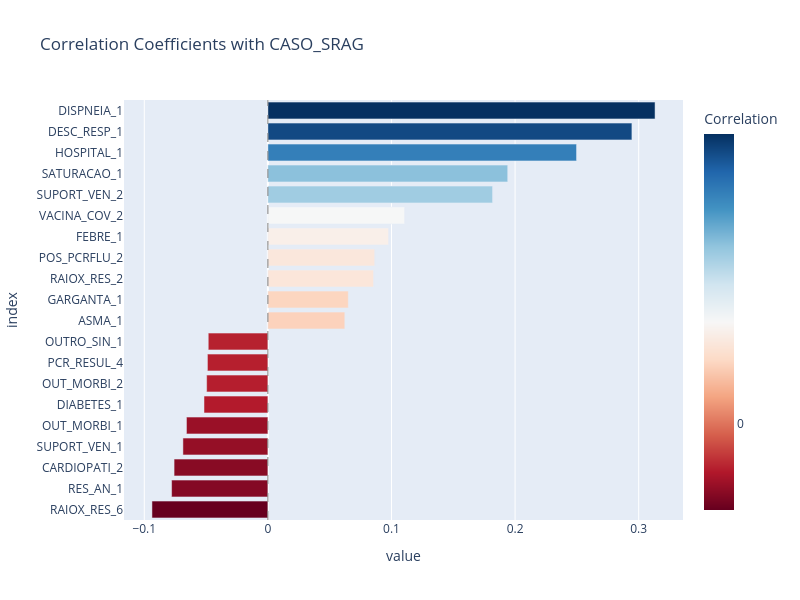

In [121]:
barplot_corr_with_target(X_train[filtered_features], y_train, top_n=20, fig_type="png")

# Modelling

In [122]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train[filtered_features], y_train)
model = TunedThresholdClassifierCV(
    model, scoring="matthews_corrcoef"
).fit(X_train[filtered_features], y_train)

In [123]:
matthews_corrcoef(y_test, model.predict(X_test[filtered_features]))

0.4830633453251909

In [124]:
model.best_threshold_

0.30073060063882007

In [125]:
def cm(clf, X, y, fig_type=None, percentage_by_class=True):
    """
    Generates an annotated heatmap of the confusion matrix for a classifier.

    Args:
        clf: Classifier object (e.g., sklearn classifier).
        X: Input features.
        y: True labels.
        alpha: Optional parameter for classifier prediction.
        fig_type: Optional figure type (e.g., 'png', 'svg').
        percentage_by_class: If True, displays percentages by class; otherwise, overall percentages.

    Returns:
        Annotated heatmap of the confusion matrix.
    """

    y_pred = clf.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    labels = np.array([["FN", "TN"], ["TP", "FP"]])
    cm = np.array([[fn, tn], [tp, fp]])

    if percentage_by_class:
        total = cm.sum(axis=0)
        percentage = cm / total * 100
    else:
        percentage = cm / np.sum(cm) * 100

    annotation_text = np.empty_like(percentage, dtype="U10")

    for i in range(percentage.shape[0]):
        for j in range(percentage.shape[1]):
            annotation_text[i, j] = f"{labels[i, j]} {percentage[i, j]:.2f}"

    fig = ff.create_annotated_heatmap(
        cm,
        x=["Positive", "Negative"],
        y=["Negative", "Positive"],
        colorscale="Blues",
        hoverinfo="z",
        annotation_text=annotation_text,
    )

    fig.update_layout(width=400, height=400, title="Confusion Matrix")
    return fig.show(fig_type)

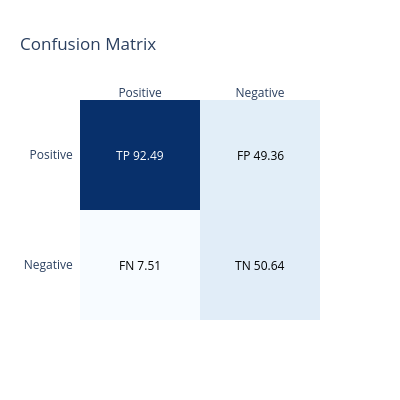

In [126]:
cm(model, X_test[filtered_features], y_test, fig_type="png")

## Análise de resíduo

In [127]:
odd_ratios = np.exp(model.estimator_.coef_)

In [128]:
results = pd.DataFrame({
    'feature': model.feature_names_in_,
    'std_coef': model.estimator_.coef_[0],
    'odd_ratio': np.exp(model.estimator_.coef_[0])
}).sort_values(by='std_coef', ascending=False).reset_index(drop=True)

In [129]:
results[results["odd_ratio"] > 1]

,feature,std_coef,odd_ratio
0,HOSPITAL_1,3.879940,48.421294
1,DISPNEIA_1,1.312726,3.716292
2,GARGANTA_1,1.180423,3.255751
3,DESC_RESP_1,1.053828,2.868612
4,ASMA_1,0.759439,2.137078
5,FEBRE_1,0.578001,1.782473
6,SATURACAO_1,0.417710,1.518480
7,PNEUMOPATI_1,0.330533,1.391710
8,VACINA_COV_2,0.322897,1.381123
9,RAIOX_RES_2,0.297069,1.345908


In [130]:
"""
Aumentam a chance de SRAG:
Apresentar DISPNEIA; (DISPNEIA)
Apresentar dor na garganta; (GARGANTA)
Apresentar desconforto respiratório; (DESC_RESP)
Apresentar saturação O2 < 95%; (SATURACAO)
Apresentar fadiga; (FADIGA)
"""


'\nAumentam a chance de SRAG:\nApresentar DISPNEIA; (DISPNEIA)\nApresentar dor na garganta; (GARGANTA)\nApresentar desconforto respiratório; (DESC_RESP)\nApresentar saturação O2 < 95%; (SATURACAO)\nApresentar fadiga; (FADIGA)\n'

In [131]:
#Remover perda de paladar? Parece que a perda de paladar não 

In [132]:
results[results["odd_ratio"] < 1].sort_values("odd_ratio")

,feature,std_coef,odd_ratio
57,SUPORT_VEN_1,-0.854529,0.425484
56,CARDIOPATI_2,-0.642421,0.526018
55,CARDIOPATI_1,-0.413755,0.661163
54,PCR_RESUL_4,-0.382869,0.681902
53,PCR_RESUL_2,-0.353256,0.702397
52,DOR_ABD_1,-0.337530,0.713531
51,PCR_RESUL_5,-0.296433,0.743466
50,UTI_1,-0.294694,0.744760
49,ANTIVIRAL_2,-0.269804,0.763529
48,POS_PCROUT_2,-0.238675,0.787671


In [133]:
"""
Diminuem a chance de SRAG:
Não apresentar tosse; (TOSSE)
Não houver desconforto respiratório; (DESC_RESP)
Não apresentar dispneia; (DISPNEIA)
"""

'\nDiminuem a chance de SRAG:\nNão apresentar tosse; (TOSSE)\nNão houver desconforto respiratório; (DESC_RESP)\nNão apresentar dispneia; (DISPNEIA)\n'

In [134]:
X = sm.add_constant(X_train[filtered_features])  # adiciona intercepto
modelo = sm.Logit(y_train.values, X_train[filtered_features]).fit()

modelo.summary()

Optimization terminated successfully.
         Current function value: 0.440410
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               166144
Model:                          Logit   Df Residuals:                   166086
Method:                           MLE   Df Model:                           57
Date:                Wed, 30 Jul 2025   Pseudo R-squ.:                  0.2149
Time:                        12:20:11   Log-Likelihood:                -73172.
converged:                       True   LL-Null:                       -93198.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
FEBRE_1          0.4025      0.014     29.258      0.000       0.376       0.429
GARGANTA_1       0.8507      0.024     35.391      0.000       0.804       0.898
DISPNEIA_1       1.2502      0.014     87.298      0.000       1.222       1.278
DESC_RESP_1      1.0023      0.014     69.571      0.000       0.974       1.031
SATURACAO_1      0.5210      0.015     34.884      0.000       0.492       0.550
DIARREIA_1      -0.0907      0.024     -3.794      0.000      -0.137      -0.044
VOMITO_1        -0.1088      0.021     -5.224      0.000      -0.150      -0.068
DOR_ABD_1       -0.3587      0.027    -13.132      0.000      -0.412      -0.305
FADIGA_1         0.0189      0.019      1.005      0.315      -0.018       0.056
PERD_OLFT_1      0.1227      0.066      1.871      0.061      -0.006       0.251
PERD_PALA_1     -0.0503      0.065     -0.770      0.441      -0.178       0.078
OUTRO_SIN_1     -0.0024      0.015     -0.159      0.874      -0.032       0.027
CARDIOPATI_1    -0.4182      0.027    -15.377      0.000      -0.471      -0.365
CARDIOPATI_2    -0.6283      0.028    -22.355      0.000      -0.683      -0.573
ASMA_1           0.7057      0.032     22.241      0.000       0.643       0.768
DIABETES_1      -0.0221      0.023     -0.962      0.336      -0.067       0.023
NEUROLOGIC_1    -0.0538      0.030     -1.813      0.070      -0.112       0.004
PNEUMOPATI_1     0.2946      0.030      9.925      0.000       0.236       0.353
IMUNODEPRE_1     0.2372      0.040      5.950      0.000       0.159       0.315
OUT_MORBI_1     -0.1237      0.025     -4.858      0.000      -0.174      -0.074
OUT_MORBI_2     -0.1866      0.028     -6.620      0.000      -0.242      -0.131
VACINA_COV_2     0.2162      0.015     14.584      0.000       0.187       0.245
ANTIVIRAL_1     -0.0656      0.028     -2.365      0.018      -0.120      -0.011
ANTIVIRAL_2     -0.3612      0.017    -21.376      0.000      -0.394      -0.328
HOSPITAL_1       1.8558      0.037     49.628      0.000       1.782       1.929
UTI_1           -0.2826      0.016    -17.649      0.000      -0.314      -0.251
SUPORT_VEN_1    -0.7952      0.024    -32.606      0.000      -0.843      -0.747
SUPORT_VEN_2     0.2061      0.016     13.035      0.000       0.175       0.237
RAIOX_RES_1     -0.0255      0.025     -1.004      0.315      -0.075       0.024
RAIOX_RES_2      0.2457      0.022     11.151      0.000       0.203       0.289
RAIOX_RES_3      0.2226      0.033      6.689      0.000       0.157       0.288
RAIOX_RES_4      0.2034      0.046      4.465      0.000       0.114       0.293
RAIOX_RES_5      0.1948      0.024      8.028      0.000       0.147       0.242
RAIOX_RES_6     -0.1735      0.020     -8.469      0.000      -0.214      -0.133
TOMO_RES_1       0.0706      0.043      1.645      0.100      -0.014       0.155
TOMO_RES_2       0.0519      0.045      1.150      0.250      -0.037       0.140
TOMO_RES_3      -0.0045      0.059     -0.076      0.939      -0.120       0.111
T

# RandomForestClassifier

In [135]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, max_depth=int(np.ceil(np.log2(len(df_train)) - 1)), min_samples_leaf=5)
rf.fit(X_train[filtered_features], y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,17
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [136]:
rf.max_depth

17

In [137]:
model = TunedThresholdClassifierCV(
    rf, scoring="matthews_corrcoef"
).fit(X_train[filtered_features], y_train)

In [138]:
matthews_corrcoef(y_test, model.predict(X_test[filtered_features]))

0.6330186619920298

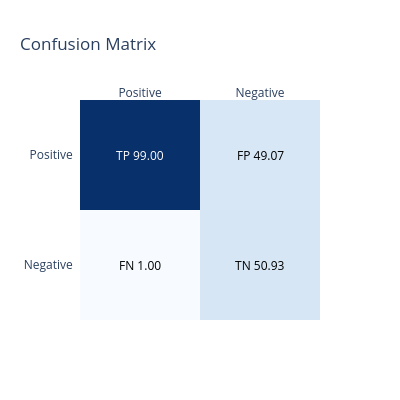

In [139]:
cm(model, X_test[filtered_features], y_test, fig_type="png")

In [140]:
results = pd.DataFrame({
    'feature': model.feature_names_in_,
    'feature_importance': model.estimator.feature_importances_,
}).sort_values(by='feature_importance', ascending=False).reset_index(drop=True)
results.head(15)

,feature,feature_importance
0,DISPNEIA_1,0.254528
1,DESC_RESP_1,0.234189
2,SATURACAO_1,0.118257
3,HOSPITAL_1,0.090820
4,SUPORT_VEN_2,0.032591
5,FEBRE_1,0.025587
6,GARGANTA_1,0.021580
7,SUPORT_VEN_1,0.019372
8,VACINA_COV_2,0.015939
9,CARDIOPATI_2,0.011293


# Conformal Prediction (Mondrian Coverage)

In [141]:
model = BinaryClassConditionalConformalClassifier(rf)
model.fit(y=y_train.values, oob=True)

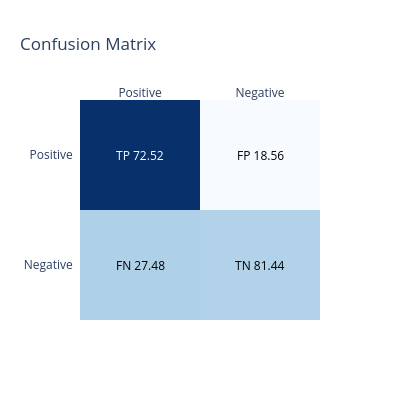

In [142]:
conformal_confusion_matrix(model, X_test[filtered_features], y_test, alpha=0.3, fig_type="png")

In [143]:
print(f"{classification_report(y_test, model.predict(X_test[filtered_features], alpha=0.3))}")

              precision    recall  f1-score   support

           0       0.50      0.81      0.62     17798
           1       0.92      0.73      0.81     53407

    accuracy                           0.75     71205
   macro avg       0.71      0.77      0.71     71205
weighted avg       0.82      0.75      0.76     71205

